In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, recall_score, precision_score, average_precision_score
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns
from collections import Counter
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
cd G:\My Drive\Case_Competition\Humana_2020\Data

G:\My Drive\Case_Competition\Humana_2020\Data


In [3]:
df = pd.read_csv('2020_Competition_Training (1).csv')
df

person_id_syn  transportation_issues src_platform_cd sex_cd  \
0      0002MOb79ST17bLYAe46eIc2                      0              EM      F   
1      0004cMOS6bTLf34Y7AIca8f3                      0              EM      F   
2      000536M9O3ST98LaYaeA29Ia                      1              EM      F   
3      0009bMO9SfTLYe77A51I4ac3                      0              EM      M   
4      000M7OeS66bTL8bY89Aa16Ie                      0              EM      M   
...                         ...                    ...             ...    ...   
69567  ffe33MOS25dTf027LaY7A5I3                      0              EM      F   
69568  fff1M4O1cfST49LY464A2Ieb                      0              EM      M   
69569  fff5MO7e401STLYcAd8e581I                      0              EM      M   
69570  fffMc37OSfTLfY7853dfA09I                      0              LV      M   
69571  fffc14bbMOfSTb7eLY5AI14d                      1              EM      M   

       est_age  smoker_current_ind  smoker_former_ind lang_spoken_cd mabh_seg  \
0           62                   1                  0            ENG      UNK   
1           59                   1                  0            ENG       C2   
2           63                   0                  0            ENG      UNK   
3           75                   0                  0            ENG       H6   
4           51                   1                  0            ENG      UNK   
...        ...                 ...                ...            ...      ...   
69567       72                   1                  0            ENG       H7   
69568       75                   0                  0            ENG       C4   
69569       76                   0                  0            ENG       H6   
69570       67                   0                  1            ENG       H6   
69571       60                   0                  0            ENG      UNK   

       cci_score  dcsi_score  fci_score  hcc_weighted_sum  betos_d1c_pmpm_ct  \
0            3.0           1          2                 0                0.0   
1            1.0           2          5                 3                0.0   
2            3.0           0          6                 0                0.0   
3            3.0           0          2                 0                0.0   
4            3.0           1          4                 0                0.0   
...          ...         ...        ...               ...                ...   
69567        5.0           2          2                 2                0.0   
69568        9.0           3          2                14                0.0   
69569        6.0           2          4                 7                0.0   
69570        2.0           0          2                 0                0.0   
69571        2.0           3          2                 0                0.0   

       betos_d1d_pmpm_ct  betos_m1b_pmpm_ct  betos_m2c_pmpm_ct  \
0                    0.0           1.162658                0.0   
1                    0.0           1.155124                0.0   
2                    0.0           0.333333                0.0   
3                    0.0           0.250000                0.0   
4                    0.0           0.083333                0.0   
...                  ...                ...                ...   
69567                0.0           1.250000                0.0   
69568                0.0           1.668168                0.0   
69569                0.0           0.666667                0.0   
69570                0.0           0.116657                0.0   
69571                0.0           0.288073                0.0   

       betos_m5b_pmpm_ct  betos_m5c_pmpm_ct  betos_m5d_pmpm_ct  \
0                    0.0           0.000000           0.000000   
1                    0.0           0.085593           0.085873   
2                    0.0           0.133333           0.083333   
3                    0.0           0.000000           

In [4]:
df.columns

Index(['person_id_syn', 'transportation_issues', 'src_platform_cd', 'sex_cd',
       'est_age', 'smoker_current_ind', 'smoker_former_ind', 'lang_spoken_cd',
       'mabh_seg', 'cci_score',
       ...
       'submcc_rar_scl_ind', 'rx_gpi2_74_ind', 'rx_gpi2_89_ind',
       'rx_gpi2_96_ind', 'submcc_rsk_obe_ind', 'rx_gpi2_22_ind',
       'submcc_rsk_synx_ind', 'submcc_rsk_coag_ind', 'submcc_rsk_othr_ind',
       'submcc_rsk_chol_ind'],
      dtype='object', length=826)

In [5]:
df_copy = df.copy()
train = df_copy.drop(columns=['transportation_issues'])
test = df[['transportation_issues']]
train.head()

person_id_syn src_platform_cd sex_cd  est_age  \
0  0002MOb79ST17bLYAe46eIc2              EM      F       62   
1  0004cMOS6bTLf34Y7AIca8f3              EM      F       59   
2  000536M9O3ST98LaYaeA29Ia              EM      F       63   
3  0009bMO9SfTLYe77A51I4ac3              EM      M       75   
4  000M7OeS66bTL8bY89Aa16Ie              EM      M       51   

   smoker_current_ind  smoker_former_ind lang_spoken_cd mabh_seg  cci_score  \
0                   1                  0            ENG      UNK        3.0   
1                   1                  0            ENG       C2        1.0   
2                   0                  0            ENG      UNK        3.0   
3                   0                  0            ENG       H6        3.0   
4                   1                  0            ENG      UNK        3.0   

   dcsi_score  fci_score  hcc_weighted_sum  betos_d1c_pmpm_ct  \
0           1          2                 0                0.0   
1           2          5                 3                0.0   
2           0          6                 0                0.0   
3           0          2                 0                0.0   
4           1          4                 0                0.0   

   betos_d1d_pmpm_ct  betos_m1b_pmpm_ct  betos_m2c_pmpm_ct  betos_m5b_pmpm_ct  \
0                0.0           1.162658                0.0                0.0   
1                0.0           1.155124                0.0                0.0   
2                0.0           0.333333                0.0                0.0   
3                0.0           0.250000                0.0                0.0   
4                0.0           0.083333                0.0                0.0   

   betos_m5c_pmpm_ct  betos_m5d_pmpm_ct  betos_o1a_pmpm_ct  betos_o1b_pmpm_ct  \
0           0.000000           0.000000               0.00                0.0   
1           0.085593           0.085873               0.00                0.0   
2           0.133333           0.083333               1.25                0.0   
3           0.000000           0.083333               0.00                0.0   
4           0.000000           0.000000               0.00                0.0   

   betos_o1e_pmpm_ct  betos_o1g_pmpm_ct  betos_t1a_pmpm_ct  betos_t1b_pmpm_ct  \
0           0.000000           0.000000           0.000000           0.000000   
1           0.000000           0.000000           0.175142           0.000000   
2           0.166667           0.083333           0.000000           0.166667   
3           0.000000           0.000000           0.000000           0.083333   
4           0.083333           0.000000           0.166667           0.166667   

   betos_t1e_pmpm_ct  betos_t1h_pmpm_ct  betos_t2a_pmpm_ct  betos_y2_pmpm_ct  \
0           0.000000           0.000000                0.0               0.0   
1           0.000000           0.090370                0.0               0.0   
2           0.083333           0.250000                0.0               0.0   
3           0.000000           0.083333                0.0               0.0   
4           0.000000           0.250000                0.0               0.0   

   bh_adtp_ind  bh_aoth_ind  bh_bipr_ind  bh_cdal_ind  bh_cdsb_ind  \
0            0            0            0            0            0   
1            0            1            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   bh_cdto_ind  bh_dema_ind  ccsp_014_ind  ccsp_020_ind  ccsp_021_ind  \
0            1            0             0             0             0   
1            1            1             0             0             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            1            0             0

In [6]:
# Removing variables with missing values greater than certain threshold
missing_values = train.isnull().sum()/len(train)*100
missing_values[missing_values>0].sort_values(ascending=False)

hedis_ami                                99.665095
hedis_cmc_ldc_c_control                  78.957052
hedis_cmc_ldc_c_screen                   78.954177
cons_homstat                             27.712298
cons_n2029_y                             27.710861
cons_retail_buyer                        27.710861
cons_ret_y                               27.710861
cons_n2pmv                               27.709423
cons_n2pbl                               27.709423
cons_n2mob                               27.709423
cons_veteran_y                           27.709423
cons_hcaccprf_h                          27.709423
cons_hcaccprf_p                          27.709423
cons_n65p_y                              27.709423
cons_hhcomp                              27.707986
cons_online_buyer                        27.705111
cons_cmys                                27.693612
cms_ra_factor_type_cd                     6.071408
cms_partd_ra_factor_amt                   5.482090
cms_ma_risk_score_nbr          

In [7]:
#Saving missing values in a variable
a = train.isnull().sum()/len(train)*100
variables = train.columns
# saving column names in a variable
variables_no_missing=[]
variables_missing=[]
for i in range(len(variables)):
    if a[i]<=70:
        variables_no_missing.append(variables[i])
    else:
        variables_missing.append(variables[i])

In [8]:
variables_missing

['hedis_ami', 'hedis_cmc_ldc_c_control', 'hedis_cmc_ldc_c_screen']

In [9]:
len(variables_no_missing)

822

In [10]:
train.drop(['hedis_ami', 'hedis_cmc_ldc_c_control', 'hedis_cmc_ldc_c_screen'], axis=1, inplace=True)
train.head()

person_id_syn src_platform_cd sex_cd  est_age  \
0  0002MOb79ST17bLYAe46eIc2              EM      F       62   
1  0004cMOS6bTLf34Y7AIca8f3              EM      F       59   
2  000536M9O3ST98LaYaeA29Ia              EM      F       63   
3  0009bMO9SfTLYe77A51I4ac3              EM      M       75   
4  000M7OeS66bTL8bY89Aa16Ie              EM      M       51   

   smoker_current_ind  smoker_former_ind lang_spoken_cd mabh_seg  cci_score  \
0                   1                  0            ENG      UNK        3.0   
1                   1                  0            ENG       C2        1.0   
2                   0                  0            ENG      UNK        3.0   
3                   0                  0            ENG       H6        3.0   
4                   1                  0            ENG      UNK        3.0   

   dcsi_score  fci_score  hcc_weighted_sum  betos_d1c_pmpm_ct  \
0           1          2                 0                0.0   
1           2          5                 3                0.0   
2           0          6                 0                0.0   
3           0          2                 0                0.0   
4           1          4                 0                0.0   

   betos_d1d_pmpm_ct  betos_m1b_pmpm_ct  betos_m2c_pmpm_ct  betos_m5b_pmpm_ct  \
0                0.0           1.162658                0.0                0.0   
1                0.0           1.155124                0.0                0.0   
2                0.0           0.333333                0.0                0.0   
3                0.0           0.250000                0.0                0.0   
4                0.0           0.083333                0.0                0.0   

   betos_m5c_pmpm_ct  betos_m5d_pmpm_ct  betos_o1a_pmpm_ct  betos_o1b_pmpm_ct  \
0           0.000000           0.000000               0.00                0.0   
1           0.085593           0.085873               0.00                0.0   
2           0.133333           0.083333               1.25                0.0   
3           0.000000           0.083333               0.00                0.0   
4           0.000000           0.000000               0.00                0.0   

   betos_o1e_pmpm_ct  betos_o1g_pmpm_ct  betos_t1a_pmpm_ct  betos_t1b_pmpm_ct  \
0           0.000000           0.000000           0.000000           0.000000   
1           0.000000           0.000000           0.175142           0.000000   
2           0.166667           0.083333           0.000000           0.166667   
3           0.000000           0.000000           0.000000           0.083333   
4           0.083333           0.000000           0.166667           0.166667   

   betos_t1e_pmpm_ct  betos_t1h_pmpm_ct  betos_t2a_pmpm_ct  betos_y2_pmpm_ct  \
0           0.000000           0.000000                0.0               0.0   
1           0.000000           0.090370                0.0               0.0   
2           0.083333           0.250000                0.0               0.0   
3           0.000000           0.083333                0.0               0.0   
4           0.000000           0.250000                0.0               0.0   

   bh_adtp_ind  bh_aoth_ind  bh_bipr_ind  bh_cdal_ind  bh_cdsb_ind  \
0            0            0            0            0            0   
1            0            1            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   bh_cdto_ind  bh_dema_ind  ccsp_014_ind  ccsp_020_ind  ccsp_021_ind  \
0            1            0             0             0             0   
1            1            1             0             0             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            1            0             0

In [11]:
#Imputation
for col in variables_no_missing:
    train[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
#Checking whether all the columns are filled with values
train.isnull().sum()/len(train)

person_id_syn          0.0
src_platform_cd        0.0
sex_cd                 0.0
est_age                0.0
smoker_current_ind     0.0
                      ... 
rx_gpi2_22_ind         0.0
submcc_rsk_synx_ind    0.0
submcc_rsk_coag_ind    0.0
submcc_rsk_othr_ind    0.0
submcc_rsk_chol_ind    0.0
Length: 822, dtype: float64

In [13]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
from sklearn.feature_selection import VarianceThreshold
numeric = train.select_dtypes(include=[np.number])
sel = VarianceThreshold(threshold=0.5)
sel.fit(numeric)

VarianceThreshold(threshold=0.5)

In [14]:
sum(sel.get_support())

84

In [15]:
new_list = [x for x in numeric.columns if x not in numeric.columns[sel.get_support()]]
for i in new_list:
    del train[i]

In [16]:
train

person_id_syn src_platform_cd sex_cd  est_age  \
0      0002MOb79ST17bLYAe46eIc2              EM      F       62   
1      0004cMOS6bTLf34Y7AIca8f3              EM      F       59   
2      000536M9O3ST98LaYaeA29Ia              EM      F       63   
3      0009bMO9SfTLYe77A51I4ac3              EM      M       75   
4      000M7OeS66bTL8bY89Aa16Ie              EM      M       51   
...                         ...             ...    ...      ...   
69567  ffe33MOS25dTf027LaY7A5I3              EM      F       72   
69568  fff1M4O1cfST49LY464A2Ieb              EM      M       75   
69569  fff5MO7e401STLYcAd8e581I              EM      M       76   
69570  fffMc37OSfTLfY7853dfA09I              LV      M       67   
69571  fffc14bbMOfSTb7eLY5AI14d              EM      M       60   

      lang_spoken_cd mabh_seg  cci_score  dcsi_score  fci_score  \
0                ENG      UNK        3.0           1          2   
1                ENG       C2        1.0           2          5   
2                ENG      UNK        3.0           0          6   
3                ENG       H6        3.0           0          2   
4                ENG      UNK        3.0           1          4   
...              ...      ...        ...         ...        ...   
69567            ENG       H7        5.0           2          2   
69568            ENG       C4        9.0           3          2   
69569            ENG       H6        6.0           2          4   
69570            ENG       H6        2.0           0          2   
69571            ENG      UNK        2.0           3          2   

       hcc_weighted_sum  cms_ma_risk_score_nbr  cms_partd_ra_factor_amt  \
0                     0                  0.339                    0.000   
1                     3                  0.710                    1.728   
2                     0                  3.091                    1.594   
3                     0                  0.526                    0.779   
4                     0                  0.680                    2.398   
...                 ...                    ...                      ...   
69567                 2                  0.551                    0.821   
69568                14                  2.240                    1.418   
69569                 7                  2.026                    0.896   
69570                 0                  0.588                    0.724   
69571                 0                  0.276                    0.855   

      cms_ra_factor_type_cd  cms_risk_adj_payment_rate_a_amt  \
0                        CN                             0.00   
1                        CP                           306.56   
2                        CN                           302.39   
3                        CN                           223.04   
4                        CF                            95.14   
...                     ...                              ...   
69567                    CN                           248.20   
69568                    CF                          2616.21   
69569                    CN                           758.41   
69570                    CN                           146.75   
69571                     E                           158.66   

       cms_risk_adj_payment_rate_b_amt  cms_risk_adjustment_factor_a_amt  \
0                                 0.00                             0.339   
1                               415.88                             0.810   
2                               491.62                             1.096   
3                               276.00                             0.526   
4                               251.70                             0.550   
...                                ...                               ...   
69567                           315.08                             0.752   
69568                          2766.89                             4.240   
69569                          1153.69                

In [17]:
#categorical Columns
categ_cols = train.select_dtypes(include='object')
categ_cols

person_id_syn src_platform_cd sex_cd lang_spoken_cd  \
0      0002MOb79ST17bLYAe46eIc2              EM      F            ENG   
1      0004cMOS6bTLf34Y7AIca8f3              EM      F            ENG   
2      000536M9O3ST98LaYaeA29Ia              EM      F            ENG   
3      0009bMO9SfTLYe77A51I4ac3              EM      M            ENG   
4      000M7OeS66bTL8bY89Aa16Ie              EM      M            ENG   
...                         ...             ...    ...            ...   
69567  ffe33MOS25dTf027LaY7A5I3              EM      F            ENG   
69568  fff1M4O1cfST49LY464A2Ieb              EM      M            ENG   
69569  fff5MO7e401STLYcAd8e581I              EM      M            ENG   
69570  fffMc37OSfTLfY7853dfA09I              LV      M            ENG   
69571  fffc14bbMOfSTb7eLY5AI14d              EM      M            ENG   

      mabh_seg cms_ra_factor_type_cd cons_cmys cons_hhcomp cons_homstat  \
0          UNK                    CN         4           B            Y   
1           C2                    CP         4           U            R   
2          UNK                    CN         6           C            R   
3           H6                    CN         4           B            Y   
4          UNK                    CF         4           J            R   
...        ...                   ...       ...         ...          ...   
69567       H7                    CN         4           B            Y   
69568       C4                    CF         4           B            Y   
69569       H6                    CN         3           B            Y   
69570       H6                    CN         3           J            U   
69571      UNK                     E         4           B            Y   

      hedis_dia_eye hedis_dia_hba1c_ge9 hedis_dia_hba1c_test  \
0                 Y                   N                    N   
1                 Y                   N                    N   
2                 Y                   N                    Y   
3                 Y                   N                    Y   
4                 Y                   N                    N   
...             ...                 ...                  ...   
69567             Y                   N                    Y   
69568             Y                   N                    Y   
69569             Y                   N                    Y   
69570             Y                   N                    N   
69571             Y                   N                    Y   

      hedis_dia_ldc_c_control hedis_dia_ldc_c_screen hedis_dia_ma_nephr  \
0                           N                      N                  Y   
1                           N                      Y                  N   
2                           Y                      Y                  Y   
3                           Y                      Y                  Y   
4                           Y                      Y                  Y   
...                       ...                    ...                ...   
69567                       Y                      Y                  Y   
69568                       Y                      Y                  Y   
69569                       Y                      Y                  N   
69570                       N                      Y                  N   
69571                       N                      Y                  Y   

      rucc_category zip_cd cnty_cd state_cd  
0           1-Metro  other   other    other  
1           2-Metro  other   other    other  
2           1-Metro  other   other    other  
3        7-Nonmetro  other   other    other  
4           1-Metro  other   other    other  
...             ...    ...     ...      ...  
69567       1-Metro  other   other    other  
69568       1-Metro  33437     099       FL  
69569    6-Nonmetro  other   other    other  
69570       2-Metro  other   other    other  
69571       2-Metro  other   other    other  

[69572 rows x 19 

In [18]:
#Printing cardinality of each categorical column
categ_cols.nunique()

person_id_syn              69572
src_platform_cd                2
sex_cd                         2
lang_spoken_cd                 3
mabh_seg                      16
cms_ra_factor_type_cd          9
cons_cmys                     13
cons_hhcomp                   13
cons_homstat                   5
hedis_dia_eye                  2
hedis_dia_hba1c_ge9            2
hedis_dia_hba1c_test           2
hedis_dia_ldc_c_control        2
hedis_dia_ldc_c_screen         2
hedis_dia_ma_nephr             2
rucc_category                  9
zip_cd                       840
cnty_cd                      109
state_cd                      31
dtype: int64

In [19]:
categ_cols['cons_homstat'].value_counts()

Y    54094
U     5658
P     5069
R     4176
T      575
Name: cons_homstat, dtype: int64

In [20]:
train["cons_homstat"]= train["cons_homstat"].apply(str)
train["cons_homstat"][0]

'Y'

In [21]:
train['cons_homstat']= train['cons_homstat'].replace(['U','P','R','T'],'Other')

In [22]:
train['cons_homstat'].value_counts()

Y        54094
Other    15478
Name: cons_homstat, dtype: int64

In [23]:
categ_cols['cons_cmys'].value_counts()

4.0    37577
3.0    15008
4       5229
3       4245
6.0     3089
5.0     2661
6        824
5        743
2.0      107
0.0       33
2         32
*         15
0          9
Name: cons_cmys, dtype: int64

In [24]:
train["cons_cmys"]= train["cons_cmys"].apply(str)
train["cons_cmys"][0]

'4.0'

In [25]:
train['cons_cmys']=train['cons_cmys'].replace(['0.0','2.0', '3.0', '4.0', '5.0', '6.0'],['0','2','3','4','5','6'])

In [26]:
train['cons_cmys']= train['cons_cmys'].replace(['0','*','2', '5', '6'],'3')

In [27]:
train['cons_cmys'].value_counts()

4    42806
3    26766
Name: cons_cmys, dtype: int64

In [28]:
categ_cols['rucc_category'].value_counts()

1-Metro       37390
2-Metro       16889
3-Metro        5075
6-Nonmetro     4985
4-Nonmetro     2338
7-Nonmetro     1338
8-Nonmetro      563
5-Nonmetro      542
9-Nonmetro      452
Name: rucc_category, dtype: int64

In [29]:
train['rucc_category']= train['rucc_category'].apply(str)
train['rucc_category'][0]

'1-Metro'

In [30]:
train['rucc_category']= train['rucc_category'].replace(['1-Metro','2-Metro','3-Metro'],'Metro')
train['rucc_category']= train['rucc_category'].replace(['6-Nonmetro','4-Nonmetro','7-Nonmetro','8-Nonmetro',
                                                       '5-Nonmetro', '9-Nonmetro'],'Nonmetro')

In [31]:
train['rucc_category'].value_counts()

Metro       59354
Nonmetro    10218
Name: rucc_category, dtype: int64

In [32]:
categ_cols['lang_spoken_cd'].value_counts()

ENG    63905
SPA     3683
E       1984
Name: lang_spoken_cd, dtype: int64

In [33]:
train['lang_spoken_cd']= train['lang_spoken_cd'].apply(str)
train['lang_spoken_cd'][0]

'ENG'

In [34]:
train['lang_spoken_cd']= train['lang_spoken_cd'].replace(['E','ENG'],'ENG')

In [35]:
train['lang_spoken_cd'].value_counts()

ENG    65889
SPA     3683
Name: lang_spoken_cd, dtype: int64

In [36]:
categ_cols['cons_hhcomp'].value_counts()

B    32234
L    10585
A     7032
U     5793
J     5783
D     1571
K     1480
G     1192
F      997
H      982
C      971
I      477
E      475
Name: cons_hhcomp, dtype: int64

In [37]:
train['cons_hhcomp']= train['cons_hhcomp'].apply(str)
train['cons_hhcomp'][0]

'B'

In [38]:
train['cons_hhcomp']= train['cons_hhcomp'].replace(['E','I','C','H','F','G','K','D','J','U'],'Other')

In [39]:
train['cons_hhcomp'].value_counts()

B        32234
Other    19721
L        10585
A         7032
Name: cons_hhcomp, dtype: int64

In [40]:
categ_cols['mabh_seg'].value_counts()

H2     16418
UNK    12742
H6      7415
H1      6715
C4      6462
C2      5898
H7      4148
C5      2898
H4      2203
C3      1285
H3      1077
H8       690
C6       491
H5       471
C1       347
C7       312
Name: mabh_seg, dtype: int64

In [41]:
train['mabh_seg']= train['mabh_seg'].apply(str)
train['mabh_seg']= train['mabh_seg'].replace(['H1','H2','H3','H4','H5','H6','H7', 'H8'],'Healthy')
train['mabh_seg']= train['mabh_seg'].replace(['C1','C2','C3','C4','C5','C6','C7'],'Chronic')

In [42]:
train['mabh_seg'].value_counts()

Healthy    39137
Chronic    17693
UNK        12742
Name: mabh_seg, dtype: int64

In [43]:
categ_cols['cms_ra_factor_type_cd'].value_counts()

CN    55041
CP     7023
E      3651
CF     3530
D       174
C2       67
I        43
SE       36
*         7
Name: cms_ra_factor_type_cd, dtype: int64

In [44]:
train['cms_ra_factor_type_cd']= train['cms_ra_factor_type_cd'].apply(str)
train['cms_ra_factor_type_cd']= train['cms_ra_factor_type_cd'].replace(['I','*','SE','C2', 'D','CP','CF','E'],'Other')

In [45]:
train['cms_ra_factor_type_cd'].value_counts()

CN       55041
Other    14531
Name: cms_ra_factor_type_cd, dtype: int64

As State_code, county_code & Zip_codes have almost 70% of the observations as "other" and also doesn't add much signficant value in this data, so ignoring them for further analysis. Also, person_id_sync which is ID variable. Remaining all convert categorical to dummies

In [46]:
categ_cols.columns

Index(['person_id_syn', 'src_platform_cd', 'sex_cd', 'lang_spoken_cd',
       'mabh_seg', 'cms_ra_factor_type_cd', 'cons_cmys', 'cons_hhcomp',
       'cons_homstat', 'hedis_dia_eye', 'hedis_dia_hba1c_ge9',
       'hedis_dia_hba1c_test', 'hedis_dia_ldc_c_control',
       'hedis_dia_ldc_c_screen', 'hedis_dia_ma_nephr', 'rucc_category',
       'zip_cd', 'cnty_cd', 'state_cd'],
      dtype='object')

In [47]:
#Onehot encoding--ignoring 'person_id_syn', 'zip_cd', 'cnty_cd', 'state_cd'
df_onehot = train.drop(['person_id_syn', 'zip_cd', 'cnty_cd', 'state_cd', 'lang_spoken_cd',
                        'hedis_dia_hba1c_ge9', 'hedis_dia_eye'],axis=1).copy()
df_onehot = pd.get_dummies(df_onehot, columns=['src_platform_cd', 'sex_cd',
       'mabh_seg', 'cms_ra_factor_type_cd', 'cons_cmys', 'cons_hhcomp',
       'cons_homstat', 'hedis_dia_hba1c_test', 'hedis_dia_ldc_c_control',
       'hedis_dia_ldc_c_screen', 'hedis_dia_ma_nephr', 'rucc_category'])

In [48]:
df_onehot

est_age  cci_score  dcsi_score  fci_score  hcc_weighted_sum  \
0           62        3.0           1          2                 0   
1           59        1.0           2          5                 3   
2           63        3.0           0          6                 0   
3           75        3.0           0          2                 0   
4           51        3.0           1          4                 0   
...        ...        ...         ...        ...               ...   
69567       72        5.0           2          2                 2   
69568       75        9.0           3          2                14   
69569       76        6.0           2          4                 7   
69570       67        2.0           0          2                 0   
69571       60        2.0           3          2                 0   

       cms_ma_risk_score_nbr  cms_partd_ra_factor_amt  \
0                      0.339                    0.000   
1                      0.710                    1.728   
2                      3.091                    1.594   
3                      0.526                    0.779   
4                      0.680                    2.398   
...                      ...                      ...   
69567                  0.551                    0.821   
69568                  2.240                    1.418   
69569                  2.026                    0.896   
69570                  0.588                    0.724   
69571                  0.276                    0.855   

       cms_risk_adj_payment_rate_a_amt  cms_risk_adj_payment_rate_b_amt  \
0                                 0.00                             0.00   
1                               306.56                           415.88   
2                               302.39                           491.62   
3                               223.04                           276.00   
4                                95.14                           251.70   
...                                ...                              ...   
69567                           248.20                           315.08   
69568                          2616.21                          2766.89   
69569                           758.41                          1153.69   
69570                           146.75                           202.65   
69571                           158.66                           211.50   

       cms_risk_adjustment_factor_a_amt  cms_rx_risk_score_nbr  \
0                                 0.339                  0.000   
1                                 0.810                  1.728   
2                                 1.096                  1.894   
3                                 0.526                  0.769   
4                                 0.550                  1.390   
...                                 ...                    ...   
69567                             0.752                  0.821   
69568                             4.240                  1.418   
69569                             1.026                  0.896   
69570                             0.587                  0.725   
69571                             0.276                  0.555   

       cms_tot_ma_payment_amt  cms_tot_partd_payment_amt  cons_n2mob  \
0                       38.34                       0.00         0.0   
1                      889.43                     293.47         0.0   
2                      845.81                     318.68         0.0   
3                      631.25                     250.63         0.0   
4                      547.84                     383.61         0.0   
...                       ...                        ...         ...   
69567                  682.96                      97.34         0.0   
69568                 4992.79                     516.25         0.0   
69569                 1046.30                      95.66        44.0   
69570                  595.41                      79.42         0.

In [49]:
#Removing those 826 variables which account for less than 10% variance
df_onehot.head()

est_age  cci_score  dcsi_score  fci_score  hcc_weighted_sum  \
0       62        3.0           1          2                 0   
1       59        1.0           2          5                 3   
2       63        3.0           0          6                 0   
3       75        3.0           0          2                 0   
4       51        3.0           1          4                 0   

   cms_ma_risk_score_nbr  cms_partd_ra_factor_amt  \
0                  0.339                    0.000   
1                  0.710                    1.728   
2                  3.091                    1.594   
3                  0.526                    0.779   
4                  0.680                    2.398   

   cms_risk_adj_payment_rate_a_amt  cms_risk_adj_payment_rate_b_amt  \
0                             0.00                             0.00   
1                           306.56                           415.88   
2                           302.39                           491.62   
3                           223.04                           276.00   
4                            95.14                           251.70   

   cms_risk_adjustment_factor_a_amt  cms_rx_risk_score_nbr  \
0                             0.339                  0.000   
1                             0.810                  1.728   
2                             1.096                  1.894   
3                             0.526                  0.769   
4                             0.550                  1.390   

   cms_tot_ma_payment_amt  cms_tot_partd_payment_amt  cons_n2mob  cons_n2pbl  \
0                   38.34                       0.00         0.0         1.0   
1                  889.43                     293.47         0.0         0.0   
2                  845.81                     318.68         0.0         7.0   
3                  631.25                     250.63         0.0         1.0   
4                  547.84                     383.61         0.0        76.0   

   cons_n2pmv  credit_bal_1stmtg_30to59dpd  credit_bal_1stmtg_60to89dpd  \
0        97.0                   487.048923                   103.961152   
1        97.0                   736.396800                    67.407302   
2        99.0                   812.221141                   438.147742   
3        97.0                   358.841276                   183.596965   
4        54.0                   838.991933                   187.087345   

   credit_bal_1stmtg_collections  credit_bal_1stmtg_severederog  \
0                     352.677575                      16.698264   
1                     666.090394                      12.411038   
2                     305.128557                      21.777211   
3                     409.647023                      20.494205   
4                     214.631689                      25.102828   

   credit_bal_1stmtgcredit_60dpd  credit_bal_agency1stmorg_collectio  \
0                     864.263515                           95.568043   
1                    1497.425917                           38.133474   
2                     741.709853                          188.208901   
3                     907.747763                          133.815779   
4                     939.246970                          129.389129   

   credit_bal_agencyfirstmtg_60dpd  credit_bal_agencyfirstmtg_new  \
0                       364.200415                    2760.529777   
1                        85.131254                    3113.744009   
2                       272.287671                   12353.966902   
3                       202.232738                    7378.311578   
4                       254.559068                    1729.765887   

   credit_bal_autobank  credit_bal_autobank_new  credit_bal_autofinance  \
0          2245.510843              1739.445839             2172.577397   
1          4759.465844               824.572660             3078.235986   
2          6064.546605              2187.506169             4606.637501   
3   

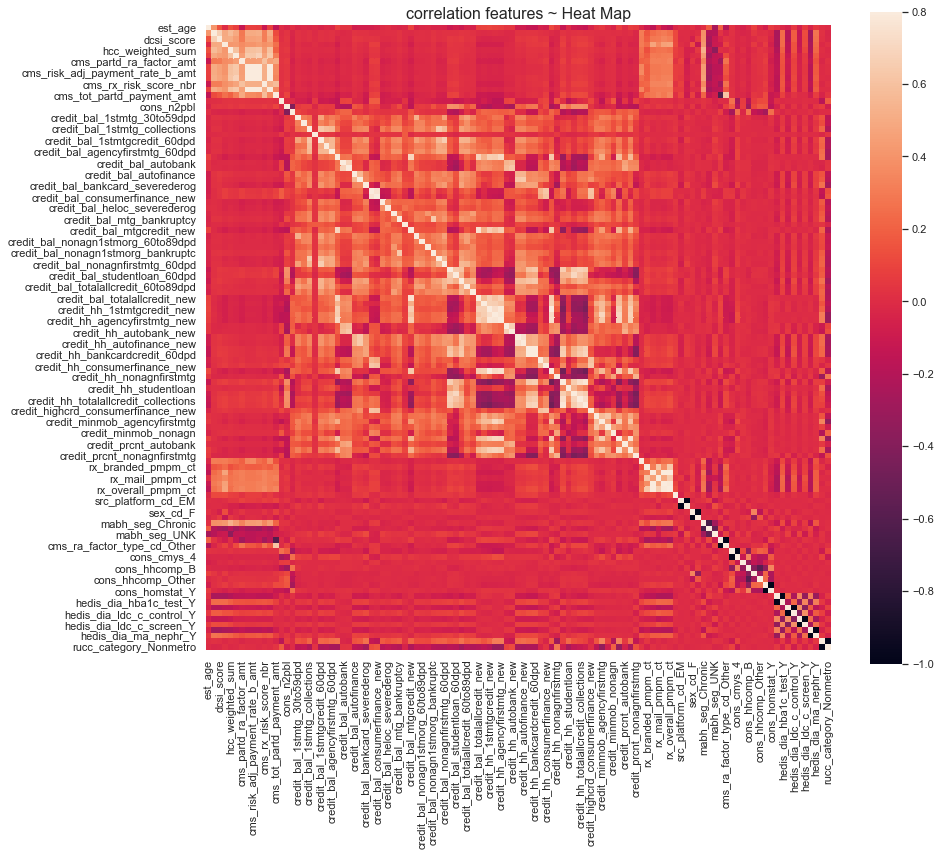

In [50]:
#High Correlation Filter
#Checking correlation between independent variables and if that crosses threshold we can drop one of the variables
f, ax = plt.subplots(figsize=(14,12))
plt.title("correlation features ~ Heat Map", y=1, size=16)
sns.heatmap(df_onehot.corr(), square=True, vmax=0.8)

In [51]:
corr_matrix = df_onehot.corr().abs()

high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i,j]>0.7:
            col = corr_matrix.columns[i]
            high_corr.add(col)

high_corr

{'cms_ra_factor_type_cd_Other',
 'cms_risk_adj_payment_rate_b_amt',
 'cms_risk_adjustment_factor_a_amt',
 'cms_tot_ma_payment_amt',
 'cons_cmys_4',
 'cons_homstat_Y',
 'credit_bal_consumerfinance_new',
 'credit_bal_totalallcredit_new',
 'credit_hh_agencyfirstmtg',
 'credit_hh_agencyfirstmtg_new',
 'credit_hh_autofinance_new',
 'credit_hh_bankcardcredit_60dpd',
 'credit_hh_mtgcredit_new',
 'credit_hh_studentloan_60dpd',
 'credit_hh_totalallcredit_collections',
 'credit_hh_totalallcredit_severederog',
 'credit_prcnt_agencyfirstmtg',
 'credit_prcnt_mtgcredit',
 'hedis_dia_hba1c_test_Y',
 'hedis_dia_ldc_c_control_Y',
 'hedis_dia_ldc_c_screen_Y',
 'hedis_dia_ma_nephr_Y',
 'rucc_category_Nonmetro',
 'rx_maint_pmpm_ct',
 'rx_overall_pmpm_ct',
 'sex_cd_M',
 'src_platform_cd_LV'}

Removing these 3 variables which show high correlation from above data.

In [52]:
corr_df = df_onehot.drop(['cms_ra_factor_type_cd_Other',
 'cms_risk_adj_payment_rate_b_amt',
 'cms_risk_adjustment_factor_a_amt',
 'cms_tot_ma_payment_amt',
 'cons_cmys_4',
 'cons_homstat_Y',
 'credit_bal_consumerfinance_new',
 'credit_bal_totalallcredit_new',
 'credit_hh_agencyfirstmtg',
 'credit_hh_agencyfirstmtg_new',
 'credit_hh_autofinance_new',
 'credit_hh_bankcardcredit_60dpd',
 'credit_hh_mtgcredit_new',
 'credit_hh_studentloan_60dpd',
 'credit_hh_totalallcredit_collections',
 'credit_hh_totalallcredit_severederog',
 'credit_prcnt_agencyfirstmtg',
 'credit_prcnt_mtgcredit',
 'hedis_dia_hba1c_test_Y',
 'hedis_dia_ldc_c_control_Y',
 'hedis_dia_ldc_c_screen_Y',
 'hedis_dia_ma_nephr_Y',
 'rucc_category_Nonmetro',
 'rx_maint_pmpm_ct',
 'rx_overall_pmpm_ct',
 'sex_cd_M',
 'src_platform_cd_LV'], axis=1)

corr_df

est_age  cci_score  dcsi_score  fci_score  hcc_weighted_sum  \
0           62        3.0           1          2                 0   
1           59        1.0           2          5                 3   
2           63        3.0           0          6                 0   
3           75        3.0           0          2                 0   
4           51        3.0           1          4                 0   
...        ...        ...         ...        ...               ...   
69567       72        5.0           2          2                 2   
69568       75        9.0           3          2                14   
69569       76        6.0           2          4                 7   
69570       67        2.0           0          2                 0   
69571       60        2.0           3          2                 0   

       cms_ma_risk_score_nbr  cms_partd_ra_factor_amt  \
0                      0.339                    0.000   
1                      0.710                    1.728   
2                      3.091                    1.594   
3                      0.526                    0.779   
4                      0.680                    2.398   
...                      ...                      ...   
69567                  0.551                    0.821   
69568                  2.240                    1.418   
69569                  2.026                    0.896   
69570                  0.588                    0.724   
69571                  0.276                    0.855   

       cms_risk_adj_payment_rate_a_amt  cms_rx_risk_score_nbr  \
0                                 0.00                  0.000   
1                               306.56                  1.728   
2                               302.39                  1.894   
3                               223.04                  0.769   
4                                95.14                  1.390   
...                                ...                    ...   
69567                           248.20                  0.821   
69568                          2616.21                  1.418   
69569                           758.41                  0.896   
69570                           146.75                  0.725   
69571                           158.66                  0.555   

       cms_tot_partd_payment_amt  cons_n2mob  cons_n2pbl  cons_n2pmv  \
0                           0.00         0.0         1.0        97.0   
1                         293.47         0.0         0.0        97.0   
2                         318.68         0.0         7.0        99.0   
3                         250.63         0.0         1.0        97.0   
4                         383.61         0.0        76.0        54.0   
...                          ...         ...         ...         ...   
69567                      97.34         0.0         1.0        97.0   
69568                     516.25         0.0         1.0        97.0   
69569                      95.66        44.0         2.0        98.0   
69570                      79.42         0.0         9.0        73.0   
69571                      95.19         0.0         1.0        97.0   

       credit_bal_1stmtg_30to59dpd  credit_bal_1stmtg_60to89dpd  \
0                       487.048923                   103.961152   
1                       736.396800                    67.407302   
2                       812.221141                   438.147742   
3                       358.841276                   183.596965   
4                       838.991933                   187.087345   
...                            ...                          ...   
69567                   631.031131                   317.633273   
69568                   669.688676                   168.766718   
69569                   519.348463                   335.191741   
69570                   673.774726                   454.321263   
69571                   410.112892                   203.848135   

       credit_bal_1stmtg_colle

In [53]:
set(corr_df.columns)

{'cci_score',
 'cms_ma_risk_score_nbr',
 'cms_partd_ra_factor_amt',
 'cms_ra_factor_type_cd_CN',
 'cms_risk_adj_payment_rate_a_amt',
 'cms_rx_risk_score_nbr',
 'cms_tot_partd_payment_amt',
 'cons_cmys_3',
 'cons_hhcomp_A',
 'cons_hhcomp_B',
 'cons_hhcomp_L',
 'cons_hhcomp_Other',
 'cons_homstat_Other',
 'cons_n2mob',
 'cons_n2pbl',
 'cons_n2pmv',
 'credit_bal_1stmtg_30to59dpd',
 'credit_bal_1stmtg_60to89dpd',
 'credit_bal_1stmtg_collections',
 'credit_bal_1stmtg_severederog',
 'credit_bal_1stmtgcredit_60dpd',
 'credit_bal_agency1stmorg_collectio',
 'credit_bal_agencyfirstmtg_60dpd',
 'credit_bal_agencyfirstmtg_new',
 'credit_bal_autobank',
 'credit_bal_autobank_new',
 'credit_bal_autofinance',
 'credit_bal_autofinance_new',
 'credit_bal_bankcard_severederog',
 'credit_bal_consumerfinance',
 'credit_bal_heloc_60dpd',
 'credit_bal_heloc_severederog',
 'credit_bal_mtg_90to119dpd',
 'credit_bal_mtg_bankruptcy',
 'credit_bal_mtg_severederog',
 'credit_bal_mtgcredit_new',
 'credit_bal_nonagn

In [54]:
corr_df.head()

est_age  cci_score  dcsi_score  fci_score  hcc_weighted_sum  \
0       62        3.0           1          2                 0   
1       59        1.0           2          5                 3   
2       63        3.0           0          6                 0   
3       75        3.0           0          2                 0   
4       51        3.0           1          4                 0   

   cms_ma_risk_score_nbr  cms_partd_ra_factor_amt  \
0                  0.339                    0.000   
1                  0.710                    1.728   
2                  3.091                    1.594   
3                  0.526                    0.779   
4                  0.680                    2.398   

   cms_risk_adj_payment_rate_a_amt  cms_rx_risk_score_nbr  \
0                             0.00                  0.000   
1                           306.56                  1.728   
2                           302.39                  1.894   
3                           223.04                  0.769   
4                            95.14                  1.390   

   cms_tot_partd_payment_amt  cons_n2mob  cons_n2pbl  cons_n2pmv  \
0                       0.00         0.0         1.0        97.0   
1                     293.47         0.0         0.0        97.0   
2                     318.68         0.0         7.0        99.0   
3                     250.63         0.0         1.0        97.0   
4                     383.61         0.0        76.0        54.0   

   credit_bal_1stmtg_30to59dpd  credit_bal_1stmtg_60to89dpd  \
0                   487.048923                   103.961152   
1                   736.396800                    67.407302   
2                   812.221141                   438.147742   
3                   358.841276                   183.596965   
4                   838.991933                   187.087345   

   credit_bal_1stmtg_collections  credit_bal_1stmtg_severederog  \
0                     352.677575                      16.698264   
1                     666.090394                      12.411038   
2                     305.128557                      21.777211   
3                     409.647023                      20.494205   
4                     214.631689                      25.102828   

   credit_bal_1stmtgcredit_60dpd  credit_bal_agency1stmorg_collectio  \
0                     864.263515                           95.568043   
1                    1497.425917                           38.133474   
2                     741.709853                          188.208901   
3                     907.747763                          133.815779   
4                     939.246970                          129.389129   

   credit_bal_agencyfirstmtg_60dpd  credit_bal_agencyfirstmtg_new  \
0                       364.200415                    2760.529777   
1                        85.131254                    3113.744009   
2                       272.287671                   12353.966902   
3                       202.232738                    7378.311578   
4                       254.559068                    1729.765887   

   credit_bal_autobank  credit_bal_autobank_new  credit_bal_autofinance  \
0          2245.510843              1739.445839             2172.577397   
1          4759.465844               824.572660             3078.235986   
2          6064.546605              2187.506169             4606.637501   
3          6106.353309              2288.854216             6498.695809   
4          2944.040395              1423.329936             5812.127058   

   credit_bal_autofinance_new  credit_bal_bankcard_severederog  \
0                 3760.277040                       274.968906   
1                 1398.949053                       257.883410   
2                 1919.059093                       337.356549   
3                 3010.652099                       455.594858   
4                 2176.680793                       478.031858   

   credit_bal_consumerfinance  cr

In [55]:
from sklearn.preprocessing import MinMaxScaler
corr_df_std = MinMaxScaler().fit_transform(corr_df)
df_new = pd.DataFrame(corr_df_std, columns=corr_df.columns)
df_new.head()

est_age  cci_score  dcsi_score  fci_score  hcc_weighted_sum  \
0  0.530120     0.1875         0.1   0.166667              0.00   
1  0.493976     0.0625         0.2   0.416667              0.15   
2  0.542169     0.1875         0.0   0.500000              0.00   
3  0.686747     0.1875         0.0   0.166667              0.00   
4  0.397590     0.1875         0.1   0.333333              0.00   

   cms_ma_risk_score_nbr  cms_partd_ra_factor_amt  \
0               0.035922                 0.000000   
1               0.075236                 0.142211   
2               0.327541                 0.131183   
3               0.055738                 0.064110   
4               0.072057                 0.197350   

   cms_risk_adj_payment_rate_a_amt  cms_rx_risk_score_nbr  \
0                         0.000000               0.000000   
1                         0.061505               0.147617   
2                         0.060668               0.161797   
3                         0.044748               0.065693   
4                         0.019088               0.118743   

   cms_tot_partd_payment_amt  cons_n2mob  cons_n2pbl  cons_n2pmv  \
0                   0.000000         0.0    0.010101    0.979798   
1                   0.342076         0.0    0.000000    0.979798   
2                   0.371461         0.0    0.070707    1.000000   
3                   0.292140         0.0    0.010101    0.979798   
4                   0.447145         0.0    0.767677    0.545455   

   credit_bal_1stmtg_30to59dpd  credit_bal_1stmtg_60to89dpd  \
0                     0.088186                     0.026682   
1                     0.133334                     0.017301   
2                     0.147063                     0.112454   
3                     0.064973                     0.047121   
4                     0.151910                     0.048017   

   credit_bal_1stmtg_collections  credit_bal_1stmtg_severederog  \
0                       0.068051                       0.006548   
1                       0.128525                       0.004867   
2                       0.058876                       0.008540   
3                       0.079043                       0.008037   
4                       0.041414                       0.009844   

   credit_bal_1stmtgcredit_60dpd  credit_bal_agency1stmorg_collectio  \
0                       0.072170                            0.048286   
1                       0.125046                            0.019267   
2                       0.061936                            0.095092   
3                       0.075802                            0.067610   
4                       0.078432                            0.065374   

   credit_bal_agencyfirstmtg_60dpd  credit_bal_agencyfirstmtg_new  \
0                         0.091046                       0.054576   
1                         0.021282                       0.061568   
2                         0.068069                       0.244481   
3                         0.050556                       0.145986   
4                         0.063637                       0.034172   

   credit_bal_autobank  credit_bal_autobank_new  credit_bal_autofinance  \
0             0.102668                 0.226253                0.092478   
1             0.281908                 0.085127                0.165840   
2             0.374958                 0.295370                0.289645   
3             0.377939                 0.311003                0.442908   
4             0.152472                 0.177490                0.387293   

   credit_bal_autofinance_new  credit_bal_bankcard_severederog  \
0                    0.478741                         0.106359   
1                    0.157584                         0.099428   
2                    0.228323                         0.131667   
3                    0.376787                         0.179633   
4                    0.263361                         0.188734   

   credit_bal_consumerfinanc

In [56]:
test['transportation_issues'].value_counts()

0    59375
1    10197
Name: transportation_issues, dtype: int64

In [57]:
data = pd.concat([df_new,test], axis=1)
data.head()

est_age  cci_score  dcsi_score  fci_score  hcc_weighted_sum  \
0  0.530120     0.1875         0.1   0.166667              0.00   
1  0.493976     0.0625         0.2   0.416667              0.15   
2  0.542169     0.1875         0.0   0.500000              0.00   
3  0.686747     0.1875         0.0   0.166667              0.00   
4  0.397590     0.1875         0.1   0.333333              0.00   

   cms_ma_risk_score_nbr  cms_partd_ra_factor_amt  \
0               0.035922                 0.000000   
1               0.075236                 0.142211   
2               0.327541                 0.131183   
3               0.055738                 0.064110   
4               0.072057                 0.197350   

   cms_risk_adj_payment_rate_a_amt  cms_rx_risk_score_nbr  \
0                         0.000000               0.000000   
1                         0.061505               0.147617   
2                         0.060668               0.161797   
3                         0.044748               0.065693   
4                         0.019088               0.118743   

   cms_tot_partd_payment_amt  cons_n2mob  cons_n2pbl  cons_n2pmv  \
0                   0.000000         0.0    0.010101    0.979798   
1                   0.342076         0.0    0.000000    0.979798   
2                   0.371461         0.0    0.070707    1.000000   
3                   0.292140         0.0    0.010101    0.979798   
4                   0.447145         0.0    0.767677    0.545455   

   credit_bal_1stmtg_30to59dpd  credit_bal_1stmtg_60to89dpd  \
0                     0.088186                     0.026682   
1                     0.133334                     0.017301   
2                     0.147063                     0.112454   
3                     0.064973                     0.047121   
4                     0.151910                     0.048017   

   credit_bal_1stmtg_collections  credit_bal_1stmtg_severederog  \
0                       0.068051                       0.006548   
1                       0.128525                       0.004867   
2                       0.058876                       0.008540   
3                       0.079043                       0.008037   
4                       0.041414                       0.009844   

   credit_bal_1stmtgcredit_60dpd  credit_bal_agency1stmorg_collectio  \
0                       0.072170                            0.048286   
1                       0.125046                            0.019267   
2                       0.061936                            0.095092   
3                       0.075802                            0.067610   
4                       0.078432                            0.065374   

   credit_bal_agencyfirstmtg_60dpd  credit_bal_agencyfirstmtg_new  \
0                         0.091046                       0.054576   
1                         0.021282                       0.061568   
2                         0.068069                       0.244481   
3                         0.050556                       0.145986   
4                         0.063637                       0.034172   

   credit_bal_autobank  credit_bal_autobank_new  credit_bal_autofinance  \
0             0.102668                 0.226253                0.092478   
1             0.281908                 0.085127                0.165840   
2             0.374958                 0.295370                0.289645   
3             0.377939                 0.311003                0.442908   
4             0.152472                 0.177490                0.387293   

   credit_bal_autofinance_new  credit_bal_bankcard_severederog  \
0                    0.478741                         0.106359   
1                    0.157584                         0.099428   
2                    0.228323                         0.131667   
3                    0.376787                         0.179633   
4                    0.263361                         0.188734   

   credit_bal_consumerfinanc

In [58]:
data['transportation_issues'].value_counts()

0    59375
1    10197
Name: transportation_issues, dtype: int64

In [59]:
#Factor Analysis
from factor_analyzer import FactorAnalyzer
#Before factor analysis, we need to evaluate Factorability, which means "can we found the factors in the dataset?"
#Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix.
#If the test found statistically insignificant, you should not employ a factor analysis.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data)
chi_square_value, p_value


(nan, nan)

In [60]:
fa = FactorAnalyzer()
fa.fit(df_new)
ev, v = fa.get_eigenvalues()
ev

array([1.09762626e+01, 7.53705676e+00, 6.00080199e+00, 3.89336748e+00,
       2.48025629e+00, 2.28684272e+00, 2.25175303e+00, 1.79829761e+00,
       1.72997289e+00, 1.56412207e+00, 1.53790482e+00, 1.44855268e+00,
       1.38059622e+00, 1.21954544e+00, 1.14555877e+00, 1.12941284e+00,
       1.05788392e+00, 1.02211106e+00, 9.93605029e-01, 9.68967894e-01,
       9.34510115e-01, 9.31484246e-01, 9.04564528e-01, 9.01818516e-01,
       8.81283375e-01, 8.65526565e-01, 8.32073507e-01, 8.24453508e-01,
       8.04566534e-01, 7.51556449e-01, 7.45660904e-01, 7.29150036e-01,
       7.06600124e-01, 6.93802600e-01, 6.72153778e-01, 6.51013562e-01,
       6.44218176e-01, 6.13878883e-01, 6.06299592e-01, 5.92837338e-01,
       5.80948538e-01, 5.67468162e-01, 5.63256244e-01, 5.55952648e-01,
       5.49234944e-01, 5.40838891e-01, 5.37412645e-01, 5.03558115e-01,
       4.70241350e-01, 4.56669483e-01, 4.47966569e-01, 4.41529394e-01,
       4.30084301e-01, 4.23173567e-01, 4.18558503e-01, 4.16917614e-01,
      

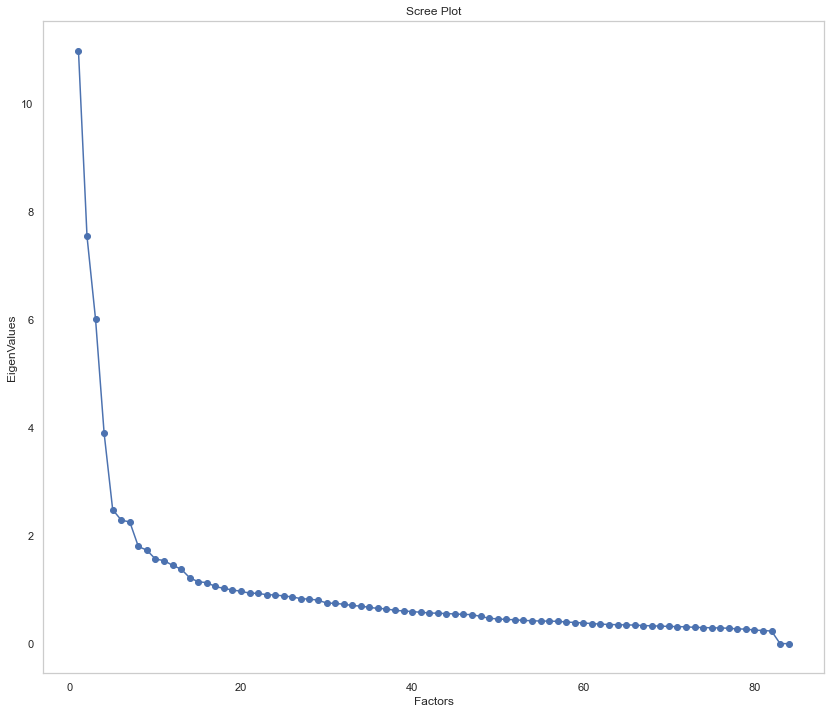

In [61]:
#Scree Plot
f, ax = plt.subplots(figsize=(14,12))
plt.scatter(range(1,df_new.shape[1]+1),ev)
plt.plot(range(1,df_new.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('EigenValues')
plt.grid()
plt.show()

In [62]:
#PCA
from sklearn.preprocessing import StandardScaler
corr_df_std = StandardScaler().fit_transform(corr_df)
corr_df_std.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [63]:
print(data.shape)
np.mean(df_new), np.std(df_new)

(69572, 85)


(est_age                                 0.636333
 cci_score                               0.294252
 dcsi_score                              0.177896
 fci_score                               0.277545
 hcc_weighted_sum                        0.134063
 cms_ma_risk_score_nbr                   0.114337
 cms_partd_ra_factor_amt                 0.083372
 cms_risk_adj_payment_rate_a_amt         0.075559
 cms_rx_risk_score_nbr                   0.084806
 cms_tot_partd_payment_amt               0.160125
 cons_n2mob                              0.068283
 cons_n2pbl                              0.122104
 cons_n2pmv                              0.945092
 credit_bal_1stmtg_30to59dpd             0.150530
 credit_bal_1stmtg_60to89dpd             0.072797
 credit_bal_1stmtg_collections           0.079129
 credit_bal_1stmtg_severederog           0.018932
 credit_bal_1stmtgcredit_60dpd           0.107210
 credit_bal_agency1stmorg_collectio      0.076895
 credit_bal_agencyfirstmtg_60dpd         0.104579


In [64]:
from sklearn.decomposition import PCA
pca_nik = PCA(n_components=18)
pca_df = pca_nik.fit_transform(df_new)

In [65]:
pca_nik.explained_variance_ratio_

array([0.11952167, 0.11241791, 0.09075482, 0.07386956, 0.05923215,
       0.05048962, 0.04830781, 0.04730606, 0.04134467, 0.03927444,
       0.03682573, 0.03532247, 0.03317645, 0.02840136, 0.02548024,
       0.02474216, 0.01956695, 0.01196473])

In [66]:
np.sum([0.11952167, 0.11241791, 0.09075482, 0.07386956, 0.05923215,
       0.05048962, 0.04830781, 0.04730606, 0.04134467, 0.03927444,
       0.03682573, 0.03532247, 0.03317645, 0.02840136, 0.02548024,
       0.02474216, 0.01956695, 0.01196481])

0.89799888

In [67]:
pca_df_new = pd.DataFrame(data=pca_df,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9',
                                               'pc10','pc11','pc12', 'pc13', 'pc14','pc15','pc16','pc17','pc18'])
pca_df_new.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -0.742437 -0.530696  0.916337  0.211500  0.357107 -0.323493 -0.224759   
1  0.417846  0.591329  1.085005  0.046883 -0.335801 -0.947209  0.598257   
2  1.201259  0.465306  0.118548  0.049326  0.811148 -0.184282  0.040974   
3 -0.149924 -0.729779 -1.035230 -0.414438 -0.100134  0.008150 -0.154621   
4  0.762747  0.369121  0.465789 -0.664185  0.913560 -1.009692  0.418385   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.069249 -0.378374 -0.821228 -0.353235 -0.019075 -0.251240  0.558318   
1  0.053002  0.592583  0.406496 -0.154800  0.139035 -0.098988 -0.711557   
2  0.525030 -0.430323 -0.201495 -0.430010  0.490562 -0.563441  0.232860   
3  0.355799  0.168318  0.059752 -0.016781  0.608776  0.334560  0.494888   
4  0.710556  0.555071 -0.880757  0.147463  0.323164  0.111124 -0.012063   

       pc15      pc16      pc17      pc18  
0  0.745917  0.147056 -0.211072 -0.075824  
1 -0.034547  0.298802 -0.193482 -0.170718  
2 -0.360628  0.212871 -0.354579  0.016456  
3  0.358085  0.031472  0.562163 -0.297955  
4  0.545659  0.171674  0.025003 -0.020096

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_df_new,test, test_size=0.3, random_state=0)

In [69]:
y_test['transportation_issues'].value_counts()

0    17754
1     3118
Name: transportation_issues, dtype: int64

In [70]:
df_pca_seen = pd.concat([x_train, y_train], axis=1)
df_pca_seen

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
29550  1.478087  0.471201  0.455358  0.042068 -0.442441 -0.130420 -0.285512   
26830  0.731017 -1.182859 -0.043192  0.296337 -0.355388 -0.188579  0.418910   
39331 -0.585563  0.268674 -0.471542 -0.414110  0.286648  0.609428  1.048075   
17671  0.282864 -0.359157  0.137874 -0.453112  0.562171  0.284487  0.095736   
2670   0.383316  1.092579 -0.268593 -0.738506 -0.122009 -0.147833 -0.765831   
...         ...       ...       ...       ...       ...       ...       ...   
21243  0.439375  0.110566 -0.978751 -0.269897  0.166789 -0.294533  0.168401   
45891  1.558940  0.029011 -0.079458 -0.840664 -0.327904  0.185828  0.330979   
42613 -0.087263  0.137532 -0.602842  0.452405 -0.270720  0.368174  0.180933   
43567 -0.785184 -0.449336 -0.518594 -0.427145  0.363978  0.464757  1.036849   
68268 -0.437113 -0.799418  0.666071  0.295052  0.832886  0.311784  0.050165   

            pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
29550 -0.304270 -0.131183  0.206535 -0.310818  0.115515 -0.659244 -0.255768   
26830  0.075489 -0.168182 -0.063567 -0.189846 -0.268119 -0.337309  0.269866   
39331  0.045057  0.086325  0.169821  0.634500 -0.111362  0.893278 -0.113241   
17671  1.250018 -0.452613  0.259262  0.580396  0.443904 -0.869877 -0.005086   
2670  -0.362575 -0.101613 -0.009659  0.284142  0.196962 -0.564960  0.564109   
...         ...       ...       ...       ...       ...       ...       ...   
21243  0.110950 -0.312132 -0.200800  0.956258  0.275987  0.345947  0.178151   
45891  0.134943 -0.319017 -0.110629 -0.164027 -0.451118 -0.201678  0.147344   
42613  0.485740  0.360712 -0.675927 -0.080049  0.581928 -0.778394  0.005317   
43567  0.104781  0.421918  0.031482  0.419143 -0.312682 -0.109352 -0.134497   
68268 -0.307304 -0.003613 -0.519098 -0.390691  0.181816 -0.041515 -0.347400   

           pc15      pc16      pc17      pc18  transportation_issues  
29550 -0.057202  0.339098  0.061055  0.162710                      0  
26830  0.493928  0.223639  0.210504 -0.247238                      0  
39331  0.015169  0.378553 -0.809028 -0.020258                      0  
17671 -0.622351  0.145150  0.163600  0.305647                      0  
2670  -0.313654  0.050601 -0.113211  0.286214                      0  
...         ...       ...       ...       ...                    ...  
21243 -0.093323  0.889258 -0.125191 -0.187287                      0  
45891 -0.030888 -0.234747  0.505144  0.003207                      0  
42613 -0.343993  0.436090 -0.285109  0.087389                      0  
43567 -0.070088  0.034432  0.730317  0.154149                      1  
68268  0.302462  0.062276 -0.292653  0.379473                      0  

[48700 rows x 19 columns]

In [71]:
results = {}
results['oversampled']={}

data_majority = df_pca_seen[data.transportation_issues == 0]
data_minority = df_pca_seen[data.transportation_issues == 1]

data_min_oversampled = resample(data_minority, replace=True, n_samples=59375, random_state=123)
data_oversampled=pd.concat([data_majority, data_min_oversampled])

y = data_oversampled.transportation_issues
X = data_oversampled.drop('transportation_issues', axis=1)

# Split the data into training and testing sets
#X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, test_size = 0.3, random_state = 0)

clf_over_sampled = LogisticRegression(penalty='l2', max_iter=1000).fit(X, y)
y_pred_score_o = clf_over_sampled.predict(x_test)
results['oversampled']['fbeta'] = fbeta_score(y_test,y_pred_score_o,beta=1)
results['oversampled']['recall']= recall_score(y_test,y_pred_score_o)
results['oversampled']['precision'] = precision_score(y_test,y_pred_score_o)

print ("fbeta score:", results['oversampled']['fbeta'])
print('recall_score:', results['oversampled']['recall'])
print('precision_score:', results['oversampled']['precision'])

fbeta score: 0.31005263833611507
recall_score: 0.7745349583066068
precision_score: 0.19382022471910113


In [72]:
results['undersampled']={}

data_majority = df_pca_seen[data.transportation_issues == 0]
data_minority = df_pca_seen[data.transportation_issues == 1]

data_maj_undersampled = resample(data_majority, replace=True, n_samples=10197, random_state=123)
data_oversampled=pd.concat([data_minority, data_maj_undersampled])

y = data_oversampled.transportation_issues
X = data_oversampled.drop('transportation_issues', axis=1)

# Split the data into training and testing sets
#X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X, y,test_size = 0.3,random_state = 0)

clf_under_sampled  = LogisticRegression(penalty='l2', max_iter=1000).fit(X, y)
y_pred_score_u = clf_under_sampled.predict(x_test)
results['undersampled']['fbeta'] = fbeta_score(y_test,y_pred_score_u,beta=1)
results['undersampled']['recall'] = recall_score(y_test,y_pred_score_u)
results['undersampled']['precision'] = precision_score(y_test,y_pred_score_u)

print ("fbeta score:", results['undersampled']['fbeta'])
print('recall_score:', results['undersampled']['recall'])
print('precision_score:', results['undersampled']['precision'])

fbeta score: 0.3168713294180459
recall_score: 0.38069275176395123
precision_score: 0.2713763145861911


In [73]:
results['SMOTE'] = {}

y = df_pca_seen.transportation_issues
X = df_pca_seen.drop('transportation_issues', axis=1)

X_resampled_sm, y_resampled_sm = SMOTE().fit_sample(X, y)
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled_sm, y_resampled_sm,test_size = 0.3,random_state = 0)

clf_smote = LogisticRegression(penalty='l2', max_iter=10000).fit(X_resampled_sm, y_resampled_sm)
y_pred_score_sm = clf_smote.predict(x_test)
results['SMOTE']['fbeta'] = fbeta_score(y_test,y_pred_score_sm,beta=1)
results['SMOTE']['recall'] = recall_score(y_test,y_pred_score_sm)
results['SMOTE']['precision'] = precision_score(y_test,y_pred_score_sm)

print ("fbeta score:", results['SMOTE']['fbeta'])
print('recall_score:', results['SMOTE']['recall'])
print('precision_score:', results['SMOTE']['precision'])

fbeta score: 0.33804559109383286
recall_score: 0.6135343168697883
precision_score: 0.23329268292682928


In [74]:
results['NearMiss'] = {}
nm1 = NearMiss(sampling_strategy='auto', version=1)
X_resampled_nm1, y_resampled_nm1 = nm1.fit_sample(X, y)
#X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_resampled_nm1, y_resampled_nm1,test_size = 0.3,random_state = 0)
clf_nm = LogisticRegression(penalty='l2', max_iter=50000).fit(X_resampled_nm1, y_resampled_nm1)
y_pred_score_nm = clf_nm.predict(x_test)
results['NearMiss']['fbeta'] = fbeta_score(y_test,y_pred_score_nm,beta=1)
results['NearMiss']['recall'] = recall_score(y_test,y_pred_score_nm)
results['NearMiss']['precision'] = precision_score(y_test,y_pred_score_nm)


print ("fbeta score:", results['NearMiss']['fbeta'])
print('recall_score:', results['NearMiss']['recall'])
print('precision_score:', results['NearMiss']['precision'])

fbeta score: 0.27591745953292973
recall_score: 0.7161642078255291
precision_score: 0.17087542087542087


In [75]:
results['Random_forest'] = {}
#X_train_rt, X_test_rt, y_train_rt, y_test_rt =  train_test_split(X, y,test_size = 0.3,random_state = 0)
clf_RF = RandomForestClassifier(random_state=5, class_weight ='balanced')
clf_RF.fit(X, y)
y_pred_score_RF = clf_RF.predict(x_test)
results['Random_forest']['fbeta'] = fbeta_score(y_test,y_pred_score_RF,beta=1)
results['Random_forest']['recall'] = recall_score(y_test,y_pred_score_RF)
results['Random_forest']['precision'] = precision_score(y_test,y_pred_score_RF)

print ("fbeta score:", results['Random_forest']['fbeta'])
print('recall_score:', results['Random_forest']['recall'])
print('precision_score:', results['Random_forest']['precision'])


fbeta score: 0.05084244753177653
recall_score: 0.027581783194355357
precision_score: 0.32452830188679244


In [76]:
from sklearn.naive_bayes import GaussianNB
results['GNB'] = {}
clf_gnb = GaussianNB().fit(X, y)
y_pred_score_gnb = clf_gnb.predict(x_test)
results['GNB']['fbeta'] = fbeta_score(y_test,y_pred_score_gnb,beta=1)
results['GNB']['recall'] = recall_score(y_test,y_pred_score_gnb)
results['GNB']['precision'] = precision_score(y_test,y_pred_score_gnb)

print ("fbeta score:", results['GNB']['fbeta'])
print('recall_score:', results['GNB']['recall'])
print('precision_score:', results['GNB']['precision'])

fbeta score: 0.07878090856814263
recall_score: 0.04393842206542656
precision_score: 0.38055555555555554


In [77]:
results_df = pd.DataFrame(results)  
display(results_df)

oversampled  undersampled     SMOTE  NearMiss  Random_forest  \
fbeta         0.310053      0.316871  0.338046  0.275917       0.050842   
recall        0.774535      0.380693  0.613534  0.716164       0.027582   
precision     0.193820      0.271376  0.233293  0.170875       0.324528   

                GNB  
fbeta      0.078781  
recall     0.043938  
precision  0.380556

In [78]:
pca_smote_data = pd.concat([X_resampled_sm, y_resampled_sm], axis=1)
pca_smote_data['transportation_issues'].value_counts()

1    41621
0    41621
Name: transportation_issues, dtype: int64

In [79]:
pca_unseen_data= pd.concat([x_test,y_test], axis=1)
pca_unseen_data['transportation_issues'].value_counts()

0    17754
1     3118
Name: transportation_issues, dtype: int64

In [179]:
pca_smote_data.to_csv(r'G:\My Drive\Case_Competition\Humana_2020\pca_smote_sampled.csv', header=True)
pca_unseen_data.to_csv(r'G:\My Drive\Case_Competition\Humana_2020\pca_unseen_data.csv', index=False, header=True)

In [80]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
print("XGBoost version:", xgb.__version__)

clf = xgb.XGBClassifier( 
        n_estimators=5000,
        max_depth=12, 
        learning_rate=0.005, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        nthread=4,
        tree_method='hist')
    
    
h = clf.fit(x_train,y_train , eval_set=[(x_test,y_test)], verbose=50, early_stopping_rounds=150)
y_pred = clf.predict(x_test)

XGBoost version: 1.2.0
[0]	validation_0-auc:0.58957
Will train until validation_0-auc hasn't improved in 150 rounds.
[50]	validation_0-auc:0.66066
[100]	validation_0-auc:0.66110
[150]	validation_0-auc:0.66108
[200]	validation_0-auc:0.66177
[250]	validation_0-auc:0.66136
[300]	validation_0-auc:0.66085
Stopping. Best iteration:
[185]	validation_0-auc:0.66198



In [84]:
f1_score(y_test, y_pred)

0.0012808197246237589

In [86]:
accuracy_score(y_test, y_pred)

0.8505653507090839

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17751,     3],
       [ 3116,     2]], dtype=int64)

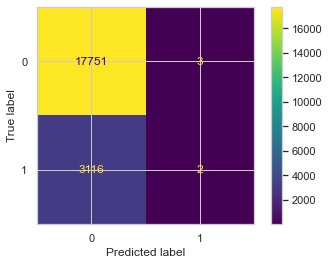

In [88]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test, y_test)

In [93]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "cpu_predictor", verbosity = 3,
                            objective = "binary:logistic")

# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )

# Fit the model
model_xgboost = xgb_rscv.fit(X_resampled_sm, y_resampled_sm)

# Model best estimators
print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",
      model_xgboost.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[10:16:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[10:16:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[10:16:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s



[10:16:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:16:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 prune

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 97.4min finished


[11:54:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 754 extra nodes, 4 pruned nodes, max_depth=10
[11:54:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 692 extra nodes, 2 pruned nodes, max_depth=10
[11:54:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 746 extra nodes, 0 pruned nodes, max_depth=10
[11:54:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 712 extra nodes, 8 pruned nodes, max_depth=10
[11:54:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 750 extra nodes, 4 pruned nodes, max_depth=10
[11:54:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 710 extr

In [94]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_resampled_sm, label=y_resampled_sm)
dtest = xgb.DMatrix(x_test, label=y_test)

In [96]:
parameters = {"learning_rate": 0.01,
               "gamma" : 0.3,
               "max_depth": 10,
               "colsample_bytree":  1.0,
               "subsample":  0.7,
               "reg_alpha": 0,
               "reg_lambda":  3,
               "min_child_weight":  7,
               "n_estimators":  250,
                'eval_metric': 'auc',
             'objective': 'binary:logistic'}

In [100]:
cv_results = xgb.train(dtrain=dtrain, params=parameters, evals=[(dtest, "Test")], 
                    num_boost_round=50, early_stopping_rounds=10)

[12:16:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:16:56] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\gbm\gbtree.cc:147: Using tree method: 2
[12:16:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 754 extra nodes, 4 pruned nodes, max_depth=10
[0]	Test-auc:0.62024
Will train until Test-auc hasn't improved in 10 rounds.
[12:16:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 692 extra nodes, 2 pruned nodes, max_depth=10
[1]	Test-auc:0.62966
[12:16:57] INFO: C:\Users\Administrator\wor

[14:44:14] ======== Monitor: Learner ========
[14:44:14] ======== Monitor: Learner ========
[14:44:14] ======== Monitor: Learner ========


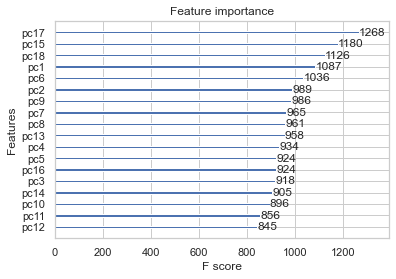

In [101]:
xgb.plot_importance(cv_results)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [226]:
from sklearn.model_selection import KFold
import lightgbm as lgb

In [227]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,
         }

In [232]:
NFOLDS = 5
folds = KFold(n_splits=NFOLDS)

columns = X_resampled_sm.columns
splits = folds.split(X_resampled_sm, y_resampled_sm)
y_preds = np.zeros(x_test.shape[0])
y_oof = np.zeros(X_resampled_sm.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X_resampled_sm[columns].iloc[train_index], X_resampled_sm[columns].iloc[valid_index]
    y_train, y_valid = y_resampled_sm.iloc[train_index], y_resampled_sm.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, 7000, valid_sets = [dtrain, dvalid], verbose_eval=200, early_stopping_rounds=500)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
    y_preds += clf.predict(x_test) / NFOLDS
    
    del X_train, X_valid, y_train, y_valid
    #gc.collect()
    
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y, y_oof)}")

Training until validation scores don't improve for 500 rounds
[200]	training's auc: 0.886074	valid_1's auc: 0.766546
[400]	training's auc: 0.92064	valid_1's auc: 0.787126
[600]	training's auc: 0.946922	valid_1's auc: 0.804549
[800]	training's auc: 0.964796	valid_1's auc: 0.81894
[1000]	training's auc: 0.976827	valid_1's auc: 0.831545
[1200]	training's auc: 0.984701	valid_1's auc: 0.84165
[1400]	training's auc: 0.989959	valid_1's auc: 0.850031
[1600]	training's auc: 0.993495	valid_1's auc: 0.857379
[1800]	training's auc: 0.995826	valid_1's auc: 0.863622
[2000]	training's auc: 0.997335	valid_1's auc: 0.868829
[2200]	training's auc: 0.998355	valid_1's auc: 0.8737
[2400]	training's auc: 0.998999	valid_1's auc: 0.877807
[2600]	training's auc: 0.999402	valid_1's auc: 0.881246
[2800]	training's auc: 0.999648	valid_1's auc: 0.884416
[3000]	training's auc: 0.999799	valid_1's auc: 0.887059
[3200]	training's auc: 0.999889	valid_1's auc: 0.889597
[3400]	training's auc: 0.999941	valid_1's auc: 0.89

KeyboardInterrupt: 

In [234]:
y_preds

array([0.03282222, 0.26131871, 0.14400943, ..., 0.1943464 , 0.02485459,
       0.02404145])

In [160]:
#Building Logistic Regression with L2 regularization
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train, y_train)

#predicting y 
y_pred = logreg.predict(x_test)

In [161]:
#Accuracy of logisitic regression
from sklearn import metrics
metrics.f1_score(y_test, y_pred)

0.0082855321861058

In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17747,     7],
       [ 3105,    13]], dtype=int64)

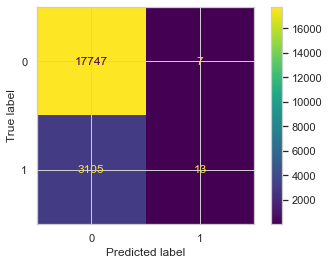

In [157]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,x_test, y_test)

In [77]:
#Building Logistic Regression with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(x_train, y_train)

#predicting y 
y_pred = logreg.predict(x_test)

In [78]:
metrics.accuracy_score(y_test, y_pred)

0.8510240747394897

In [102]:
#Building decision Tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
#Training model
clf = clf.fit(x_train,y_train)
#predicting model
y_pred = clf.predict(x_test)

In [103]:
metrics.accuracy_score(y_test, y_pred)

0.7612648221343874

In [104]:
#Building different variants of SVM models
from sklearn import svm
#Creating SVM with default properties
clf1=svm.SVC()
clf1.fit(x_train,y_train)
y_pred_1 = clf1.predict(x_test)

#Creating SVM with linear kernel
clf2=svm.SVC(kernel='linear')
clf2.fit(x_train,y_train)
y_pred_2 = clf2.predict(x_test)

#Creating SVM with RBF kernel
clf3=svm.SVC(kernel='sigmoid')
clf3.fit(x_train,y_train)
y_pred_3 = clf3.predict(x_test)

#Creating SVM with Poly kernel
clf4=svm.SVC(kernel='poly')
clf4.fit(x_train,y_train)
y_pred_4 = clf4.predict(x_test)

In [105]:
print(metrics.accuracy_score(y_test, y_pred_1))
print(metrics.accuracy_score(y_test, y_pred_2))
print(metrics.accuracy_score(y_test, y_pred_3))
print(metrics.accuracy_score(y_test, y_pred_4))

0.8506647502694934
0.8506647502694934
0.7599712540424003
0.8506647502694934


In [106]:
#Building Random Forest models
from sklearn.ensemble import RandomForestClassifier

# One random forest with gini criteria
clf1 = RandomForestClassifier(n_estimators=100, criterion='gini')
clf1.fit(x_train, y_train)
y_pred_1 = clf1.predict(x_test)


In [107]:
print(metrics.accuracy_score(y_test, y_pred_1))

0.8491555874955085


In [108]:
#Building Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
#Model 1 one with deviance loss
clf1 = GradientBoostingClassifier()
clf1.fit(x_train, y_train)
y_pred_1 = clf1.predict(x_test)

In [109]:
print(metrics.accuracy_score(y_test, y_pred_1))

0.8499461013295005


In [114]:
#Schoastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

In [115]:
metrics.accuracy_score(y_test, y_pred)

0.8492274523895077

In [121]:
#Neural Network model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', early_stopping=True, solver='adam',
                   learning_rate_init=0.001, max_iter=100, n_iter_no_change=5)
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)

In [122]:
metrics.accuracy_score(y_test, y_pred)

0.8499461013295005

In [127]:
#Neural network model
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim= 13, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=10)
y_pred = model.predict_classes(x_test)

Epoch 1/5
5566/5566 [==============================] - 8s 2ms/step - loss: 0.3984 - accuracy: 0.8539
Epoch 2/5
5566/5566 [==============================] - 16s 3ms/step - loss: 0.3884 - accuracy: 0.8541
Epoch 3/5
5566/5566 [==============================] - 13s 2ms/step - loss: 0.3878 - accuracy: 0.8541
Epoch 4/5
5566/5566 [==============================] - 19s 3ms/step - loss: 0.3873 - accuracy: 0.8541
Epoch 5/5
5566/5566 [==============================] - 32s 6ms/step - loss: 0.3870 - accuracy: 0.8541


In [128]:
metrics.accuracy_score(y_test, y_pred)

0.8506647502694934